# 02_statistical_analysis.ipynb
描述性统计与相关性分析可视化

---

## 1. 导入与数据

```python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
df = pd.read_csv('../data/processed/china_50_cities.csv', parse_dates=['Datetime'])
df.head()

df = pd.read_csv('../data/processed/china_50_cities.csv', parse_dates=['Datetime'])
polls = ['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']



In [2]:
desc = df.groupby('Station')[polls].agg(['mean','median','std']).round(2)
desc


CO(GT)              NMHC(GT)                 C6H6(GT)                \
          mean median   std     mean  median     std     mean median    std   
Station                                                                       
上海        2.13   1.92  1.21   342.99  457.65  190.21     9.48   8.49   6.35   
东莞        2.47   2.10  1.52   275.41  275.12    7.58    10.05   9.45   5.25   
中山        1.14   0.96  1.04   274.85  274.51    8.38     4.28   2.91   4.74   
乌鲁木齐      2.33   2.09  1.12   274.95  275.30    8.46     8.86   8.17   4.62   
佛山        1.33   1.31  0.58   274.98  275.35    8.04     7.35   7.32   3.44   
兰州        3.30   3.29  1.13   276.20  276.49    8.10    14.47  12.78   9.56   
包头        2.68   2.41  1.68   275.52  275.64    7.81    11.72   9.51   8.55   
北京        2.66   2.42  1.63   165.67  130.33  144.60    12.16  10.91   8.54   
南京        1.47   1.19  1.02   145.36   84.57  172.19    10.92   8.70   8.38   
南宁        2.11   1.77  1.39   275.08  274.82    7.80    11.58   9.35   8.31   
南昌        2.19   2.28  0.92   274.92  274.25    8.28    11.82  10.49   7.69   
厦门        1.82   1.60  1.22   275.34  275.72    8.05    10.96   9.72   6.90   
合肥        2.06   2.09  1.14   275.17  275.53    8.10    11.41  10.76   6.43   
呼和浩特      2.23   1.85  1.18   275.08  275.05    8.00    11.17   9.36   7.62   
哈尔滨       2.74   2.45  1.77   275.99  276.85    7.48    14.75  13.24   9.62   
唐山        3.32   2.76  2.10   274.38  273.89    7.62    14.90  11.72   9.90   
大连        1.88   1.83  1.12   275.52  275.48    7.56    11.11  10.83   6.22   
天津        2.27   1.98  1.38   283.43  272.74  171.53    11.45   9.58   7.44   
太原        2.20   1.89  1.51   273.77  273.03    7.96    11.50   8.83   8.49   
宁波        0.83   0.77  0.61   273.77  273.50    7.55     9.34   9.07   4.90   
宜昌        2.26   1.99  1.46   274.02  273.83    7.61    10.23   8.53   7.44   
广州        2.04   1.83  1.11   216.21  147.49  200.57     8.94   7.84   6.05   
惠州        2.03   1.62  1.36   275.99  276.61    7.84     7.99   5.62   6.45   
成都        2.08   1.92  1.26   275.17  275.40    7.54    11.03  10.00   7.05   
扬州        1.88   1.61  1.17   275.75  276.03    7.96     6.22   5.07   4.88   
拉萨        2.61   2.48  1.32   274.97  275.62    7.80    12.06  11.66   6.79   
无锡        1.51   1.57  0.52   275.27  274.80    7.94     5.50   4.94   2.89   
昆明        2.33   2.11  1.15   274.63  275.27    7.99    10.49   9.76   6.84   
杭州        2.16   1.76  1.36   225.07  127.03  216.81     8.32   6.47   6.72   
武汉        1.83   1.55  1.12   274.85  273.85    8.15    12.27  11.42   8.93   
江门        1.77   1.55  1.03   275.84  276.70    7.57     6.38   5.53   4.51   
沈阳        2.05   1.59  1.56   274.98  275.26    8.10     7.80   5.98   6.72   
洛阳        1.94   1.58  1.62   275.72  276.31    7.97     9.30   7.33   7.07   
济南        1.54   0.84  1.09   276.24  276.73    7.80     9.86   8.43   6.10   
海口        2.23   1.47  1.66   274.50  274.70    7.63     7.74   5.89   5.86   
深圳        2.40   2.58  1.08   288.24  266.31  190.99     9.23   8.01   5.67   
珠海        1.86   1.21  1.71   274.74  274.65    7.82    10.56   7.55   8.32   
石家庄       2.52   2.20  1.88   275.46  275.75    8.06    11.86   8.66   9.91   
芜湖        1.50   1.21  0.98   275.03  274.65    7.94     5.81   4.14   4.83   
苏州        1.27   1.33  0.52   274.89  274.73    7.80     5.49   5.28   2.52   
西宁        2.54   2.17  1.68   273.93  273.38    7.77    13.04   9.93   9.15   
西安        1.39   1.49  0.83   274.79  274.60    8.18     9.19   8.12   5.69   
贵阳        3.88   4.02  1.29   274.15  273.31    7.84    14.90  12.01   9.75   
郑州        1.65   1.54  0.99   275.87  276.79    8.09     9.12   8.99   6.00   
重庆        2.34   2.24  1.24   274.75  274.99    8.29    10.43   8.88   7.10   
银川        2.89   2.60  1.82   275.58  275.52    7.91    11.16   9.93   7.29   
镇江        2.09   1.75  1.31   275.76  275.74    7.88     8.66   6.60   6.35   
长春        2.94   2.67  1.90   273.95  272.59    8.16    15

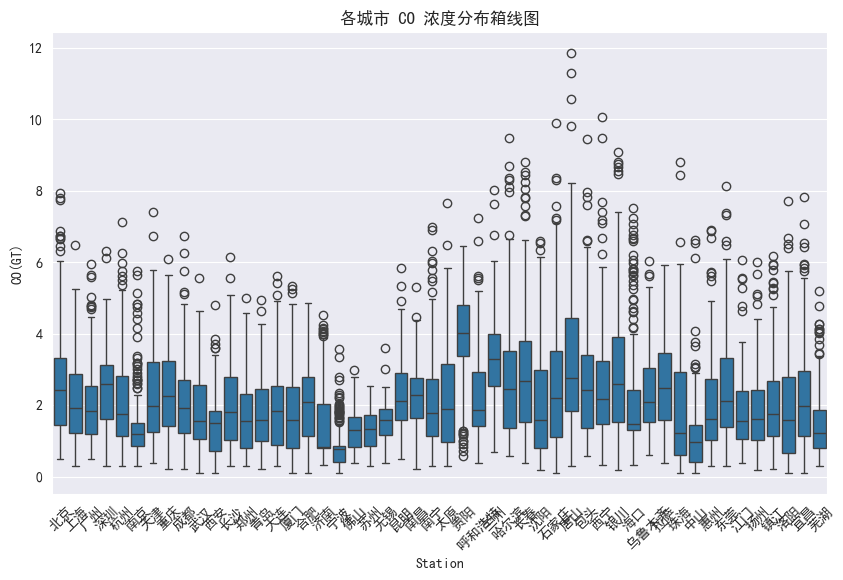

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Station', y='CO(GT)')
plt.title('各城市 CO 浓度分布箱线图')
plt.xticks(rotation=45)
plt.show()


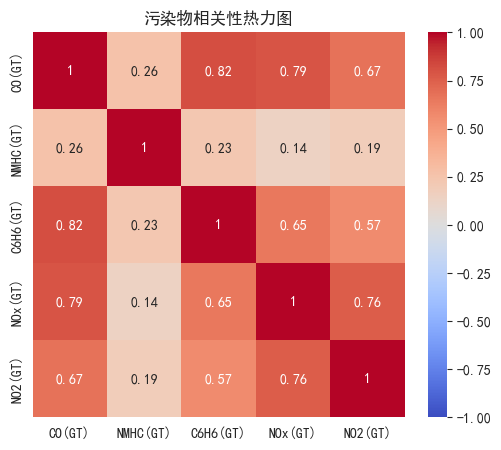

In [4]:
corr = df[polls].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('污染物相关性热力图')
plt.show()
